In [49]:
from sympy import *
from sympy.plotting import plot
#from numpy import *
#import numpy as np 
import matplotlib.pyplot as plt

%matplotlib qt 

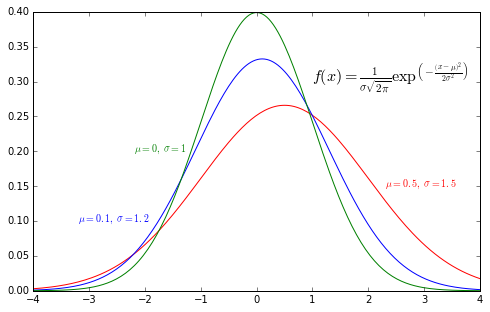

In [91]:
x, z = symbols("x z") 
expr = 1/(1.5 * sqrt(2*pi)) * exp(-(x-0.5)**2 / (2*1.5**2))
expr2= 1/(1.2 * sqrt(2*pi)) * exp(-(x-0.1)**2 / (2*1.2**2))
expr3= 1/(1 * sqrt(2*pi)) * exp(-(x-0)**2 / (2*1**2))

%matplotlib inline
evalfunc1 = lambdify(x, expr, modules=['numpy'])
evalfunc2 = lambdify(x, expr2, modules=['numpy'])
evalfunc3 = lambdify(x, expr3, modules=['numpy'])
fig = plt.gcf() 
fig.set_size_inches(8,5)
t = np.linspace(-4, 4, 200) 
plt.plot(t, evalfunc1(t),'r', t, evalfunc2(t), 'b', t, evalfunc3(t), 'g')
plt.text(-2.2,0.2, r'$\mu=0,\;\sigma = 1$', color = "green") 
plt.text(-3.2,0.1, r'$\mu=0.1,\;\sigma = 1.2$', color = "b") 
plt.text(2.3,0.15, r'$\mu=0.5,\;\sigma = 1.5$', color = "r") 
plt.text(1.0, 0.3, r'$f(x) =\frac{1}{\sigma\sqrt{2 \pi}} \exp^{\left(-\frac{{\left(x-\mu \right)}^{2}}{2\sigma^{2}}\right)}$', fontsize = 16)
#plt.text(2, 0.25, r'$1/(\sigma * \sqrt(2*\pi)) * exp(-(\mu-x)**2 / (2*0.8**2))$')  